In [26]:
# Basic stuff..
import os
import pandas as pd
import numpy as np

# nltk, matplotlib, wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# ML stuff
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import naive_bayes
from sklearn.model_selection import KFold,StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,roc_curve, roc_auc_score, auc, classification_report

## Having a look at the data...

In [2]:
ham_files = os.listdir("enron1/ham")
spam_files = os.listdir("enron1/spam")


In [3]:
def read_message(path, file):
    content = ""
    with open(f"{path}/{file}", "r") as f:
        try:
            content = f.read()
        except Exception as e:
            print(e)
            return None  # return none if f.read() fails
    return content # return the read content otherwise

In [4]:
print(read_message("enron1/ham", ham_files[4]))

Subject: meter 7268 nov allocation
fyi .
- - - - - - - - - - - - - - - - - - - - - - forwarded by lauri a allen / hou / ect on 12 / 14 / 99 12 : 17
pm - - - - - - - - - - - - - - - - - - - - - - - - - - -
kimberly vaughn
12 / 10 / 99 02 : 54 pm
to : lauri a allen / hou / ect @ ect
cc : mary m smith / hou / ect @ ect
subject : meter 7268 nov allocation
lauri . . i have put this on strangas gas until i can get a contract from
daren .
- - - - - - - - - - - - - - - - - - - - - - forwarded by kimberly vaughn / hou / ect on 12 / 10 / 99 01 : 52
pm - - - - - - - - - - - - - - - - - - - - - - - - - - -
lauri a allen
12 / 09 / 99 01 : 20 pm
to : kimberly vaughn / hou / ect @ ect , anita luong / hou / ect @ ect
cc : howard b camp / hou / ect @ ect , mary m smith / hou / ect @ ect
subject : meter 7268 nov allocation
kim / anita -
a volume of 7247 mm shows to have been allocated to the reliant 201 contract
for november . there was no nomination for reliant at this point in november
and , therefore

In [5]:
# and a smap message...
print(read_message("enron1/spam", spam_files[4]))

Subject: coca cola , mbna america , nascar partner with otcbb : imts
stock
profile
about
company
investment
highlights
press release
12 / 01 / 2003
indianapolis , in - race car simulators ? inks the sale of eight simulators for installation in moscow
09 / 17 / 2003
indianapolis , in - nascar silicon motor speedway ? simulators go international
09 / 05 / 2003
indianapolis , in - nascar silicon motor speedway ? expands to monterey , california ' s famed cannery row
09 / 02 / 2003
indianapolis , in - nascar silicon motor speedway ? announces custom upgrades to world ' s most realistic racing simulation
08 / 14 / 2003
indianapolis , in - race car simulators ? and baldacci sign agreement to develop international markets for the new generation race simulutors
08 / 12 / 2003
indianapolis , in - imts forms new subsidiary for manufacturing and sales of race car simulators
08 / 07 / 2003
indianapolis , in - nascar silicon motor speedway ? renews licensing agreement with speedway motorsports , in

### Defining a function to filter the stop words from given text input...

In [6]:
stop_words = set(stopwords.words("english"))
stop_words.add("Subject")
def filter_stop_words(message):
    words = word_tokenize(message)
    filtered_message = ""
    for word in words:
        if word not in stop_words:
            filtered_message += word
            filtered_message += " "
    return filtered_message


### Testing it out on a message..

In [7]:
print(filter_stop_words(read_message("enron1/spam", spam_files[4])))
# characters like '*' and '/' etc are not removed because a spam message, by nature, has a high chance of containing a large amount of useless characters in it.

: coca cola , mbna america , nascar partner otcbb : imts stock profile company investment highlights press release 12 / 01 / 2003 indianapolis , - race car simulators ? inks sale eight simulators installation moscow 09 / 17 / 2003 indianapolis , - nascar silicon motor speedway ? simulators go international 09 / 05 / 2003 indianapolis , - nascar silicon motor speedway ? expands monterey , california ' famed cannery row 09 / 02 / 2003 indianapolis , - nascar silicon motor speedway ? announces custom upgrades world ' realistic racing simulation 08 / 14 / 2003 indianapolis , - race car simulators ? baldacci sign agreement develop international markets new generation race simulutors 08 / 12 / 2003 indianapolis , - imts forms new subsidiary manufacturing sales race car simulators 08 / 07 / 2003 indianapolis , - nascar silicon motor speedway ? renews licensing agreement speedway motorsports , inc . , race track simulators 08 / 05 / 2003 indianapolis , - nascar silicon motor speedway ? , int .

In [8]:
ham_messages = []
spam_messages = []
for file in ham_files:
    content = read_message("enron1/ham", file)
    if content is not None:
        content = filter_stop_words(content)
        ham_messages.append(content)
print("Done processing ham files!")
for file in spam_files:
    content = read_message("enron1/spam", file)
    if content is not None:
        content = filter_stop_words(content)
        spam_messages.append(content)

Done processing ham files!
'charmap' codec can't decode byte 0x9d in position 1651: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 42: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 42: character maps to <undefined>
'charmap' codec can't decode byte 0x81 in position 87: character maps to <undefined>


In [9]:
print(len(ham_messages))
print(len(spam_messages))
print(len(spam_files))     # 4 spam files couldn't be read :/

3672
1496
1500


(-0.5, 2999.5, 1999.5, -0.5)

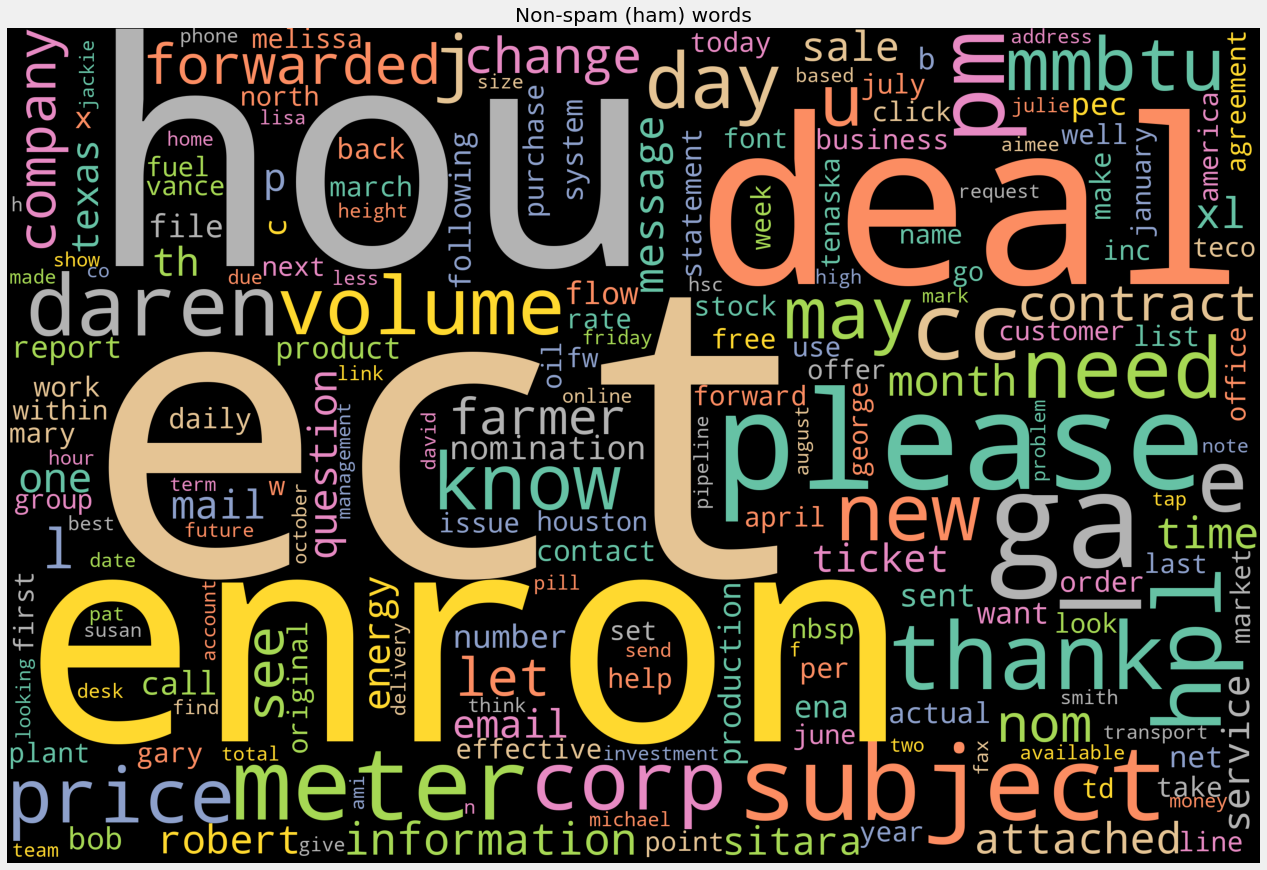

In [28]:
string = ""   
for word  in ham_messages:
    string += word
    string += " "
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.title("Non-spam (ham) words")
plt.axis("off")

# word cloud for ham words. 

(-0.5, 2999.5, 1999.5, -0.5)

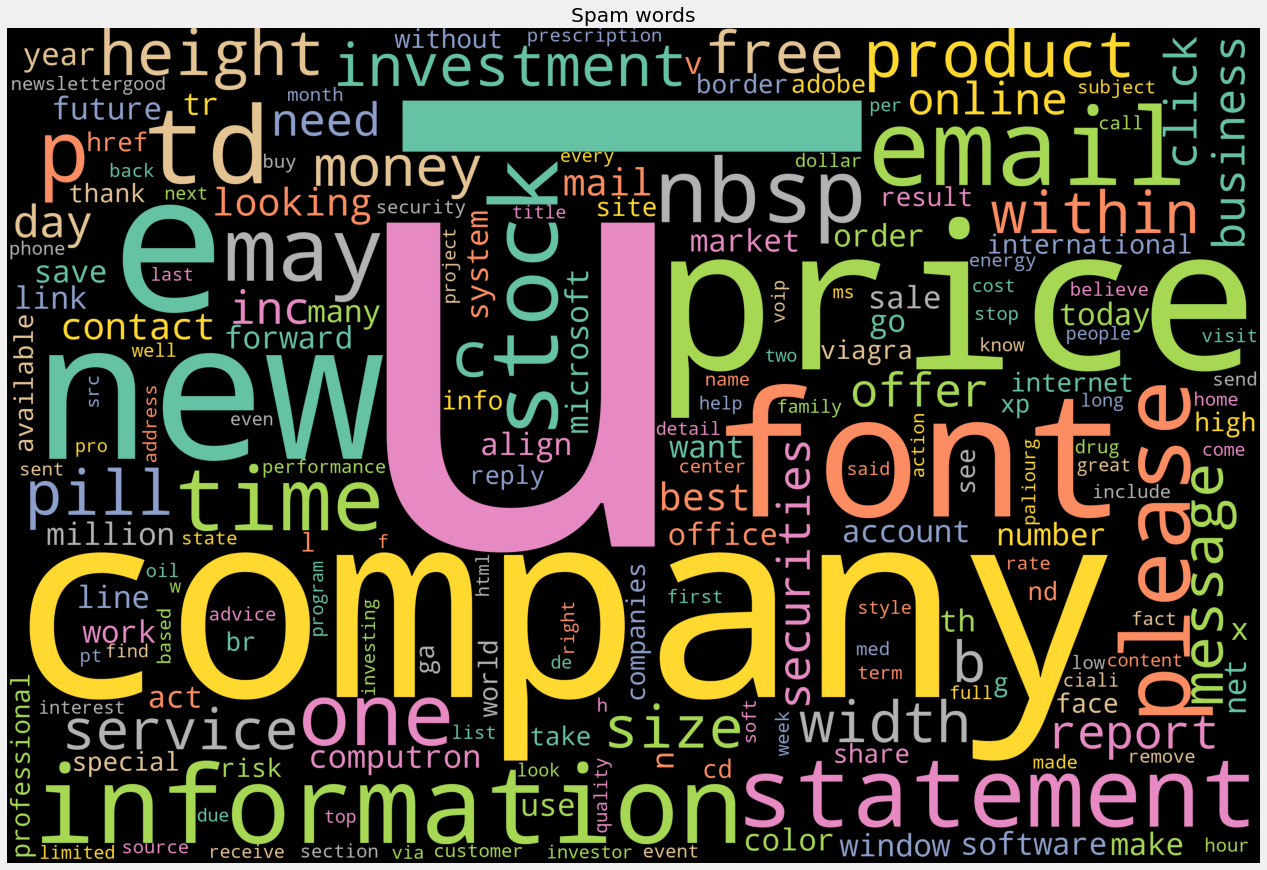

In [29]:
string = ""   
for word  in spam_messages:
    string += word
    string += " "
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(string)
plt.figure(figsize=(20,20))
plt.title("Spam words")
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
## Creating a dataframe (spreadsheet) out of the text files
### There will be 2 

In [12]:
# creating a dataframe out of the lists...
ham_labels = ["ham" for i in ham_messages]
ham_labels.extend(["spam" for i in spam_messages])

ham_messages.extend(spam_messages)
data = {"Label" : ham_labels, "Message" : ham_messages }


In [13]:
df = pd.DataFrame(data)
df.head()

,Label,Message
0,ham,: christmas tree farm pictures
1,ham,": vastar resources , inc . gary , production h..."
2,ham,: calpine daily gas nomination - calpine daily...
3,ham,: : issue fyi - see note - already done . stel...
4,ham,: meter 7268 nov allocation fyi . - - - - - - ...


In [14]:
df.tail()

,Label,Message
5163,spam,: pro - forma invoice attached divide cover ga...
5164,spam,: str _ rndlen ( 2 - 4 ) } { extra _ time _ 4 ...
5165,spam,": check ! 61 bb hey derm bbbbb check paris , m..."
5166,spam,: hot jobs global marketing specialties po box...
5167,spam,: save 89 % ink + shipping cost save 89 % inkj...


<AxesSubplot:>

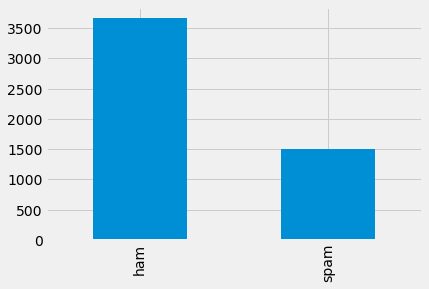

In [15]:
df.Label.value_counts().plot(kind="bar")

In [16]:
countVectorizer = CountVectorizer()
X_var = countVectorizer.fit_transform(df.Message)     # Convert the string messages into a vectorized form with the word and its frequency
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(df.Label)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_var, Y, test_size = 0.1,stratify=Y)   # train-test split with 10% data as testing data

### This block does k-fold cross-validation on logistic and complement NB with k=10

In [18]:
models = [("Logistic", LogisticRegression(max_iter=2000)), ("Naive Bayes", naive_bayes.ComplementNB())]

results = []
for model in models:
     k_fold = StratifiedKFold(10)
     res = cross_val_score(model[1], X_var, Y, cv=k_fold, scoring='accuracy') 
     results.append((model[0], res))
     print(f"{model[0]}: Mean: {res.mean()}, Std-Dev: {res.std()}")

# the results are pretty good with a very low std.deviaiton and high average accuracy

Logistic: Mean: 0.974646889478656, Std-Dev: 0.011045562048692437
Naive Bayes: Mean: 0.974645390070922, Std-Dev: 0.01469259536028226


In [20]:
# Building the model with logistic regression....
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

LogisticRegression()

### Training accuracy for logistic regression

In [22]:
accuracy_score(y_train, logisticRegression.predict(X_train))

0.9993549774242099

### Testing accuracy for logistic

In [23]:
accuracy_score(y_test, logisticRegression.predict(X_test))

0.9787234042553191